In [ ]:
!pip install joblib
!pip install seaborn matplotlib

import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Cargar datos desde el archivo Excel
ruta_excel = "/content/Base_para_el_modelo.xlsx"  # ubicación
nombre_hoja = "Sheet1"  # hoja
df = pd.read_excel(ruta_excel, sheet_name=nombre_hoja)

# Definir las características (variables independientes) y la variable objetivo (Aprobado)
columnas_a_excluir = ["Id", "APROBADO-DESEMBOLSADO"]  # Lista de columnas a excluir
X = df.drop(columnas_a_excluir, axis=1)
y = df["APROBADO-DESEMBOLSADO"]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=100)

# Crear el modelo Random Forest Classifier
modelo_aprobacion_prestamo = RandomForestClassifier()

# Entrenar el modelo
modelo_aprobacion_prestamo.fit(X_entrenamiento, y_entrenamiento)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_aprobacion_prestamo.predict(X_prueba)

Precisión: 0.7630331753554502

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       111
           1       0.79      0.68      0.73       100

    accuracy                           0.76       211
   macro avg       0.77      0.76      0.76       211
weighted avg       0.77      0.76      0.76       211


Matriz de Confusión:
 [[93 18]
 [32 68]]


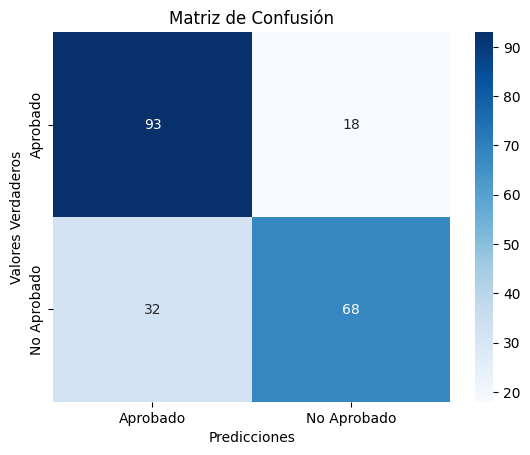

In [ ]:
# Evaluar el rendimiento del modelo
precision = accuracy_score(y_prueba, y_pred)
informe_clasificacion = classification_report(y_prueba, y_pred)
matriz_confusion = confusion_matrix(y_prueba, y_pred)

# Imprimir resultados

print("Precisión:", precision)

print("\nInforme de Clasificación:\n", informe_clasificacion)

print("\nMatriz de Confusión:\n", matriz_confusion)

# Crear la matriz de confusión
cm = confusion_matrix(y_prueba, y_pred)

# Crear un heatmap usando seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Aprobado", "No Aprobado"], yticklabels=["Aprobado", "No Aprobado"])

# Añadir etiquetas y título
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")

# Mostrar el plot
plt.show()

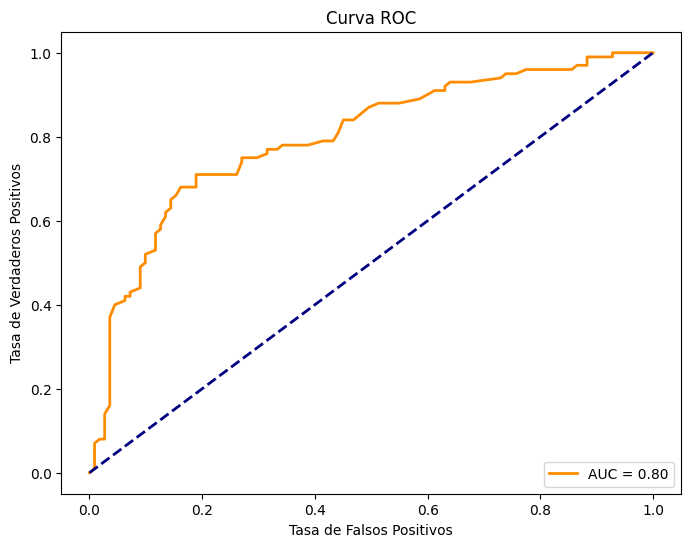

In [ ]:
# Obtener probabilidades de las clases positivas
y_prob = modelo_aprobacion_prestamo.predict_proba(X_prueba)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_prueba, y_prob)

# Calcular el área bajo la curva (AUC)
auc = roc_auc_score(y_prueba, y_prob)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Index(['Feature', 'Importance'], dtype='object')


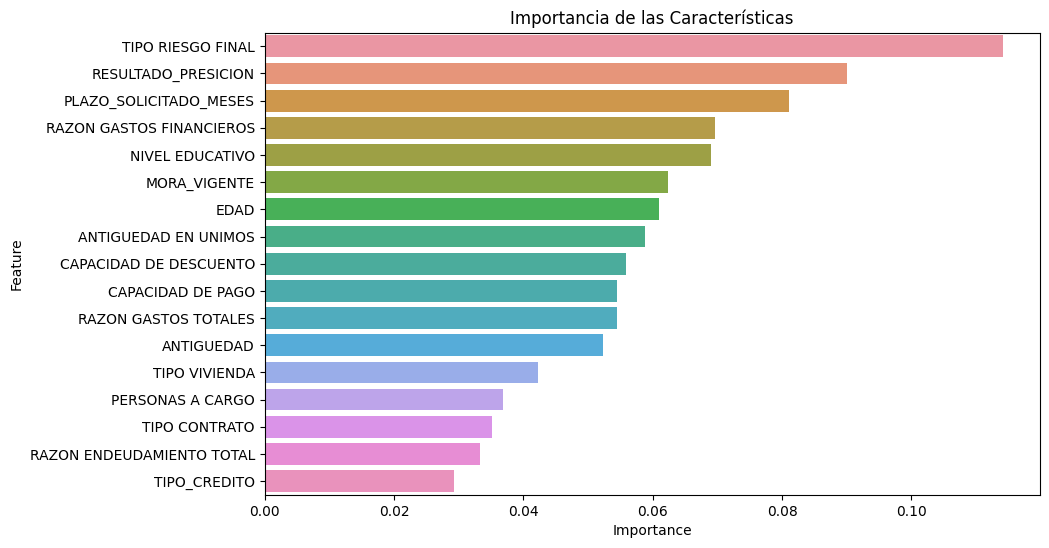

In [ ]:
# Verificar los nombres de las columnas en feature_importance_df
print(feature_importance_df.columns)

# Plotear la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Caracteristicas', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.show()


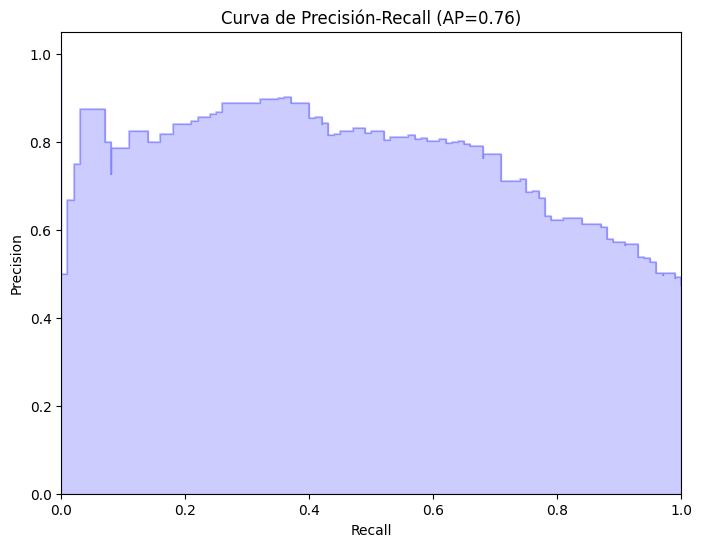

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_prueba, y_prob)

# Calcular el área bajo la curva de precisión-recall
avg_precision = average_precision_score(y_prueba, y_prob)

# Plotear la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva de Precisión-Recall (AP={:.2f})'.format(avg_precision))
plt.show()

In [ ]:
# Cargar el nuevo conjunto de datos desde un archivo Excel
ruta_nuevo_excel = "/content/BD_nuevos_para_el_modelo.xlsx"  # Cambia la ubicación y nombre del nuevo archivo
nombre_nueva_hoja = "Sheet1"  # Cambia el nombre de la hoja si es diferente
df_nuevo = pd.read_excel(ruta_nuevo_excel, sheet_name=nombre_nueva_hoja)

# Definir las características (variables independientes) y la variable objetivo (Aprobado)
columnas_a_excluir = ["Id", "APROBADO-DESEMBOLSADO"]  # Lista de columnas a excluir
X_nuevo = df_nuevo.drop(columnas_a_excluir, axis=1)


In [ ]:
# Realizar predicciones en el nuevo conjunto de datos
y_pred_nuevo = modelo_aprobacion_prestamo.predict(X_nuevo)

# Agregar las predicciones al DataFrame nuevo
df_nuevo["APROBADO-DESEMBOLSADO"] = y_pred_nuevo

In [ ]:
# Guardar el DataFrame actualizado en un nuevo archivo Excel
ruta_resultado_excel = "/content/Nuevo_documento_con_predicciones.xlsx"  # Cambia la ubicación y nombre del archivo de resultados
df_nuevo.to_excel(ruta_resultado_excel, index=False)

